In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack
import os
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [371]:
# scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
data = pd.read_csv("../new_data_processing/thisum/stats_grad_16_8_m.csv", header=None)
data.shape
Y = data.values[:, 422]
X = data.values[:, 0:422]
# X = X / (np.max(X,0) + np.spacing(0))

# print(X)

# scaler.fit(X)
# X = scaler.transform(X)

with open('../new_data_processing/thisum/stats_grad_16_8_m_nMR.csv', "a") as write_file:
    for i in range(len(X)):
        if ('H' in str(Y[i])) or ('S' in str(Y[i])) :
            line = np.array2string(X[i], precision=2, separator=',', suppress_small=True)
            line = line.replace("[", "").replace("]", "").replace("\n", "").replace(" ", "")
            line = line + "," + str(Y[i])
            write_file.write(line + "\n" )

In [192]:
data = pd.read_csv("../same_range/stats.csv", header=None)
data.shape
Y = data.values[:, 280]
X = data.values[:, 0:280]
X = X / (np.max(X,0) + np.spacing(0))

# scaler.fit(X)
# X = scaler.transform(X)

with open('../same_range/normalized_stats.csv', "a") as write_file:
    for i in range(len(X)):
        if 'M' not in str(Y[i]):
            line = np.array2string(X[i], precision=2, separator=',', suppress_small=True)
            line = line.replace("[", "").replace("]", "").replace("\n", "").replace(" ", "")
            line = line + "," + str(Y[i])
            write_file.write(line + "\n" )

In [209]:
data = pd.read_csv("../thisum/stats.csv", header=None)
data.shape
Y = data.values[:, 600]
X = data.values[:, 0:600]
X = X / (np.max(X,0) + np.spacing(0))

# scaler.fit(X)
# X = scaler.transform(X)

with open('../thisum/normalized_stats.csv', "a") as write_file:
    for i in range(len(X)):
        if 'M' not in str(Y[i]):
            line = np.array2string(X[i], precision=2, separator=',', suppress_small=True)
            line = line.replace("[", "").replace("]", "").replace("\n", "").replace(" ", "")
            line = line + "," + str(Y[i])
            write_file.write(line + "\n" )

In [145]:
validation_size = 0.20
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [146]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.401127 (0.021625)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Library/Frameworks/Python.framewo

LDA: 0.407377 (0.024846)
KNN: 0.408770 (0.024003)
CART: 0.394828 (0.044020)
NB: 0.294911 (0.022212)
SVM: 0.406022 (0.031012)


In [147]:
# Make predictions on validation dataset
labels = ['S', 'R', 'M', 'H']
knn = SVC()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
# print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions, labels))
# print(classification_report(Y_validation, predictions))

[[46  6 31 17]
 [ 9 35  6  4]
 [27  5 40 17]
 [35 10 40 30]]


In [149]:
from SVM import SVM
model = SVM(max_iter=10000, kernel_type='quadratic', C=1.0, epsilon=0.00001)
model.fit(X_train, Y_train)

TypeError: can't multiply sequence by non-int of type 'float'

In [364]:
for i in range(422):
    print ('@attribute ' + str(i+1)+'_a real')

@attribute 1_a real
@attribute 2_a real
@attribute 3_a real
@attribute 4_a real
@attribute 5_a real
@attribute 6_a real
@attribute 7_a real
@attribute 8_a real
@attribute 9_a real
@attribute 10_a real
@attribute 11_a real
@attribute 12_a real
@attribute 13_a real
@attribute 14_a real
@attribute 15_a real
@attribute 16_a real
@attribute 17_a real
@attribute 18_a real
@attribute 19_a real
@attribute 20_a real
@attribute 21_a real
@attribute 22_a real
@attribute 23_a real
@attribute 24_a real
@attribute 25_a real
@attribute 26_a real
@attribute 27_a real
@attribute 28_a real
@attribute 29_a real
@attribute 30_a real
@attribute 31_a real
@attribute 32_a real
@attribute 33_a real
@attribute 34_a real
@attribute 35_a real
@attribute 36_a real
@attribute 37_a real
@attribute 38_a real
@attribute 39_a real
@attribute 40_a real
@attribute 41_a real
@attribute 42_a real
@attribute 43_a real
@attribute 44_a real
@attribute 45_a real
@attribute 46_a real
@attribute 47_a real
@attribute 48_a real
@

36


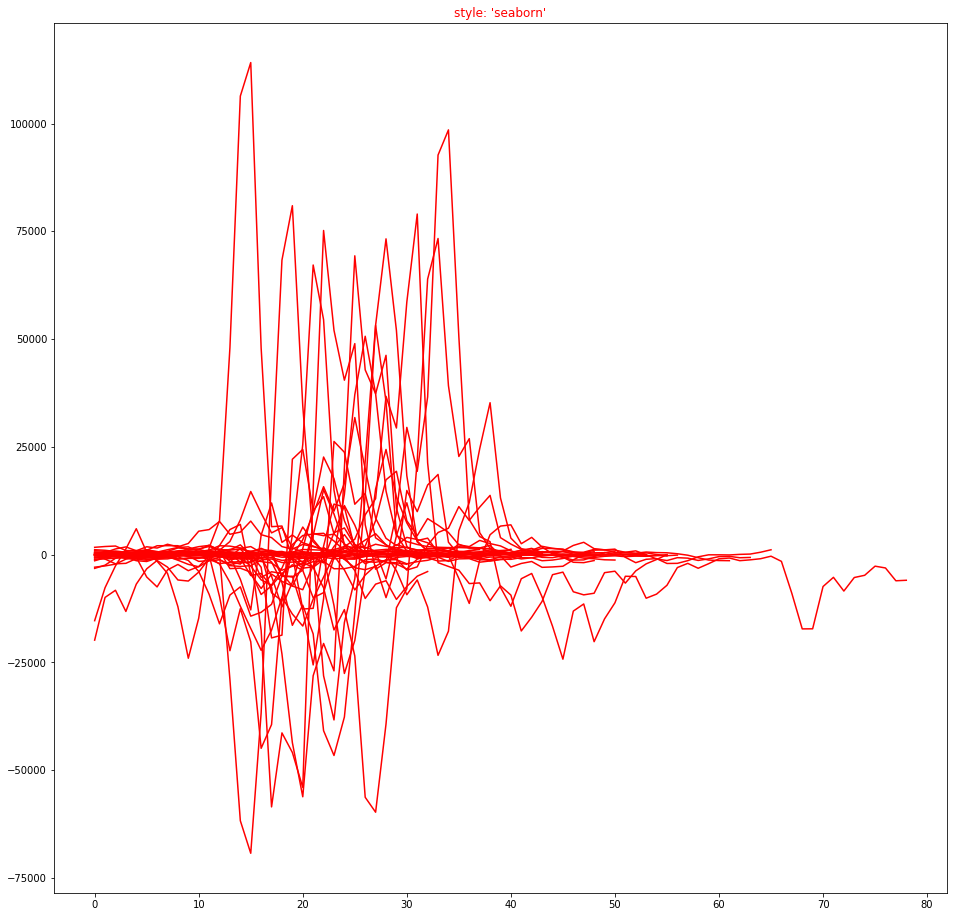

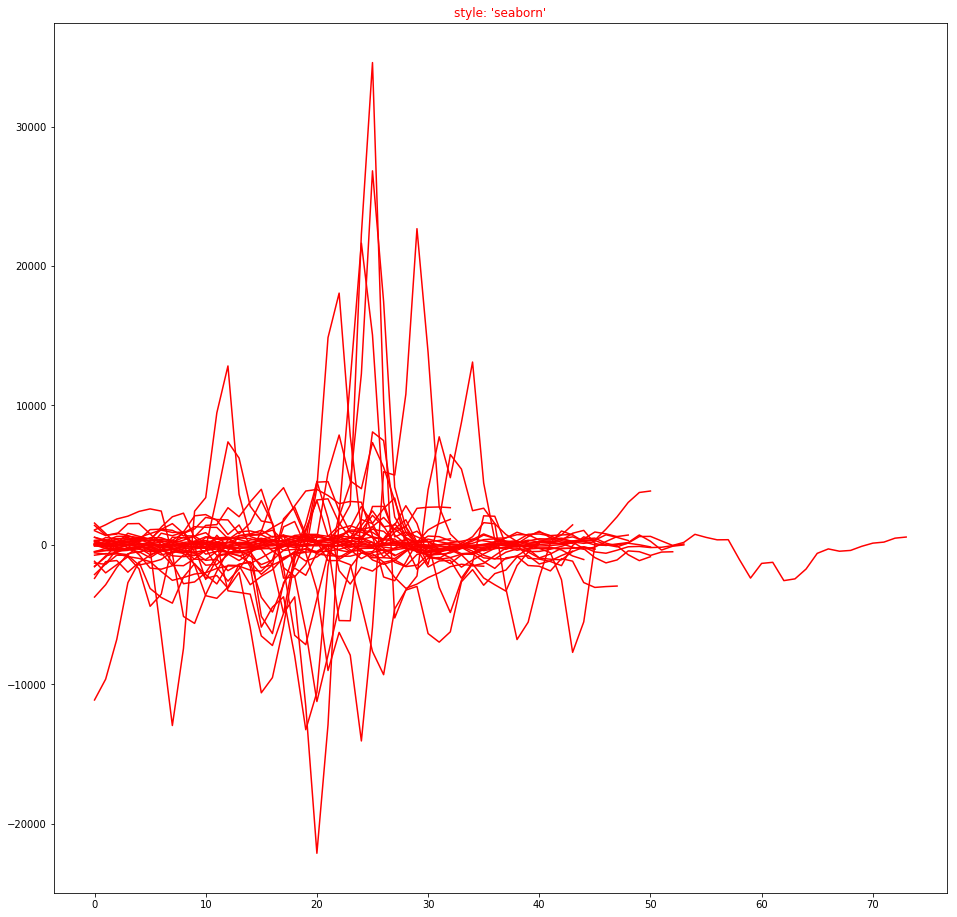

In [256]:
    plt.figure(num=1, figsize=(16, 16))
    hardList = []
    mildList = []
    softList = []
    soft_mild_list = []
    N = 5
    weights = np.ones(N) / N
    
    for root, dirs, files in os.walk("/new_data_processing/same_range_raw/"):
        for i, filename in enumerate(files):

            file = open(root + "/" + filename, "r")
            lines = file.readlines()
            for line in lines:
                [l, d] = line.split(":")
                if ('WT' in l):
                    l = l.split("-")[1]
                    d = d.replace('[', '').replace(']', '').replace('\n', '')
                    d = np.fromstring(d, dtype=int, sep=',')
                    data = np.convolve(d, weights, mode='valid')
                    x = np.arange(d.size)
                    grad = np.gradient(d, x)
#                     plt.title(filename)
#                     plt.plot(d)
                    if l == 'HR':
                        hardList.append(grad)
                        soft_mild_list.append(grad)
                    elif l == 'MI':
                        mildList.append(grad)
                    elif l == 'SO':
                        softList.append(grad)
                        soft_mild_list.append(grad)
    
    print(len(hardList))
    fig, ax = plt.subplots(figsize=(16, 16))
#     plt.rcParams['axes.color_cycle'] = ['r']
    ax.set_title('style: {!r}'.format('seaborn'), color='C2')
    for i in range(len(hardList)):
        plt.plot(hardList[i])
 
# #     print(len(softList))
#     plt.set_title('style: {!r}'.format(sty), color='C0')
#     plt.rcParams['axes.color_cycle'] = ['k']
#     for j in range(len(softList)):
#         plt.plot(softList[j])

    fig, ax1 = plt.subplots(figsize=(16, 16))
#     plt.rcParams['axes.color_cycle'] = ['r']
    ax1.set_title('style: {!r}'.format('seaborn'), color='C1')
    for i in range(len(softList)):
        plt.plot(softList[i])
    
    
    plt.show()
                    
#                     weights = np.ones(N) / N
#                     data = np.convolve(data.A, weights, mode='valid')
#                     x = np.arange(data.size)
#                     grad = np.gradient(data, x)
#                     plt.subplot(length, 1, (i+1))
    


In [259]:
label = "none"
print(len(soft_mild_list))
# soft_mild_list = softList
for i in range(len(soft_mild_list)):
    label = "none"
    for j in range(soft_mild_list[i].size-5):
        if ( soft_mild_list[i][j+5] > 500 ) and (soft_mild_list[i][j] < 500):
            label = "soft"
#         if soft_mild_list[i][j] > 15000:
#             label = "mild"
#             break
        if ( soft_mild_list[i][j+5] > 5000 ) and (soft_mild_list[i][j] < 5000):
            label = "hard"
            break
    
#     print(label)

72


beverly_raw_data.txt HPP:1802.8 HMP:-856.8 SPP:517.3 SMP:-664.1


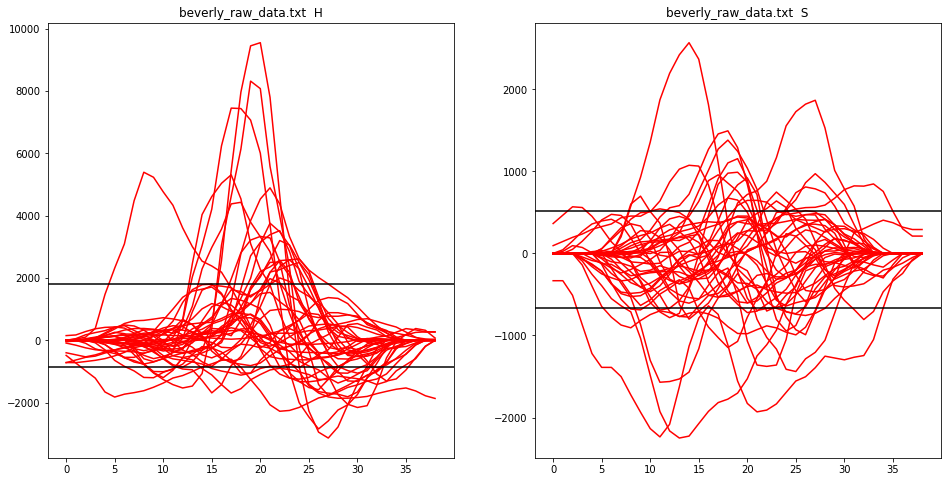

haimo_raw_data.txt HPP:1602.6 HMP:-1281.25 SPP:617.0 SMP:-600.6


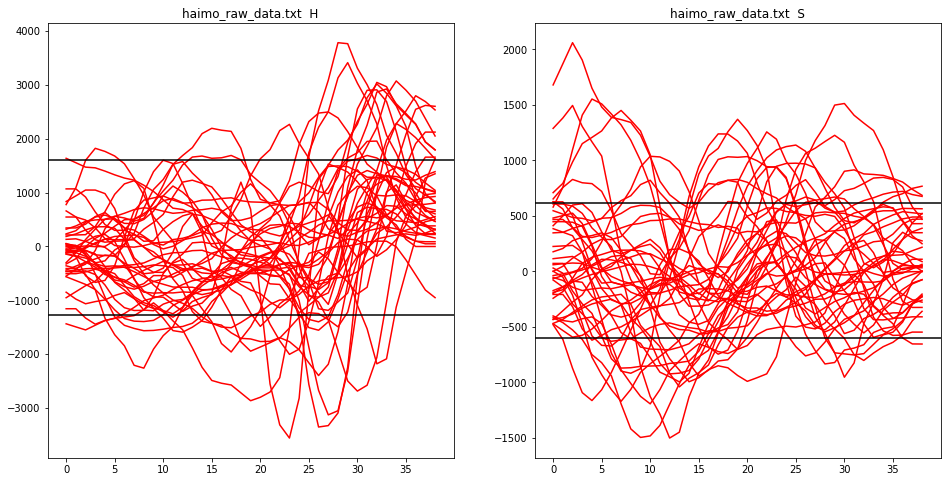

priya_raw_data.txt HPP:2424.6 HMP:-1051.9 SPP:483.7 SMP:-868.75


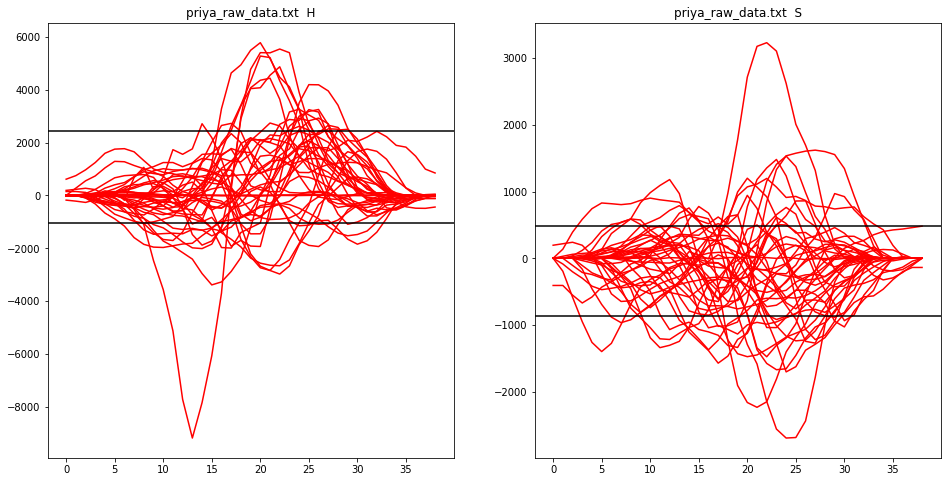

roger_raw_data.txt HPP:10877.3 HMP:-9088.25 SPP:6156.3 SMP:-5564.4


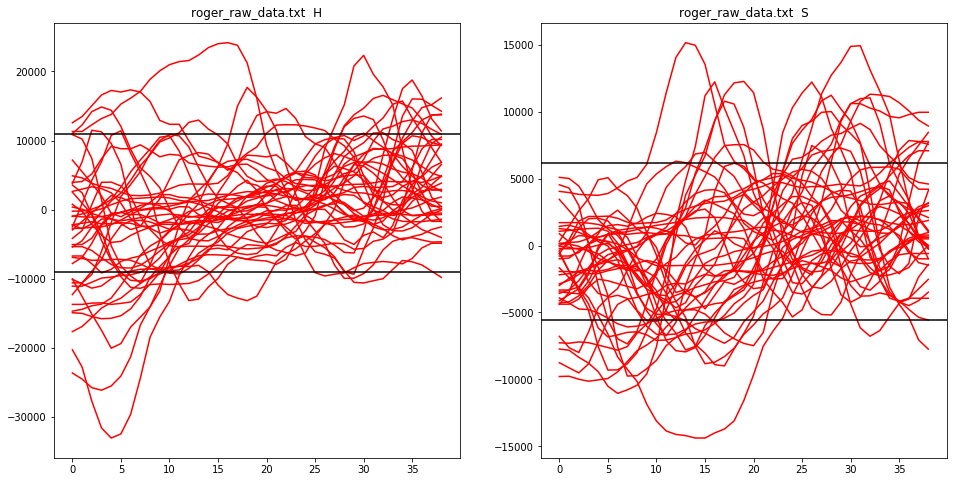

sachith_raw_data.txt HPP:1705.9 HMP:-1223.8 SPP:675.65 SMP:-756.4


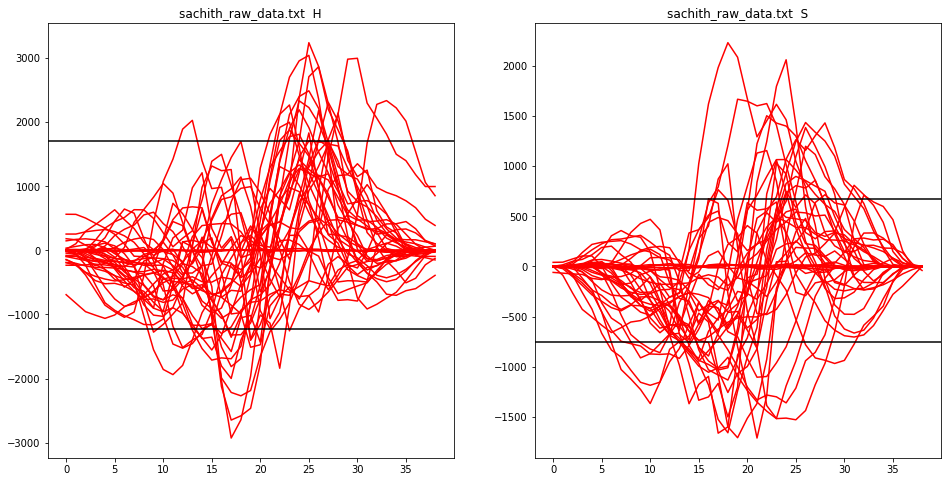

samantha_raw_data.txt HPP:3331.9 HMP:-4460.5 SPP:2034.8 SMP:-3552.0


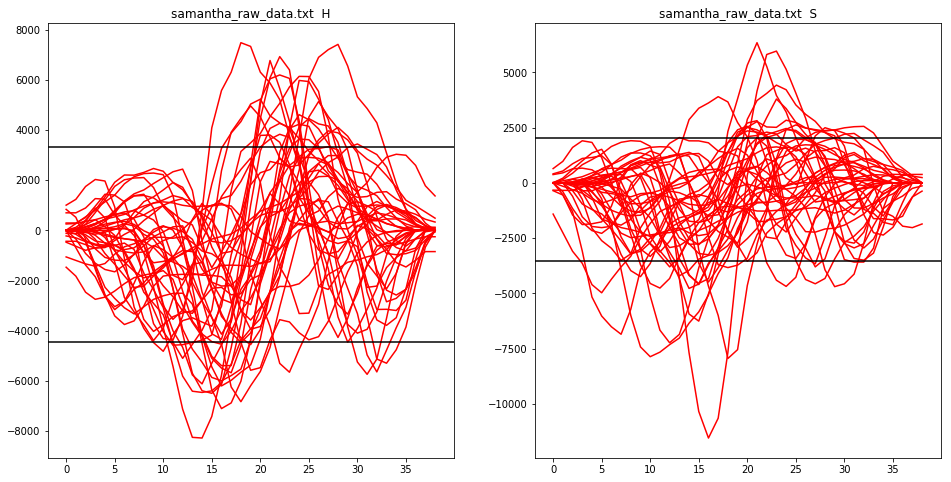

sue_raw_data.txt HPP:3357.0 HMP:-3039.0 SPP:2577.8 SMP:-2895.2


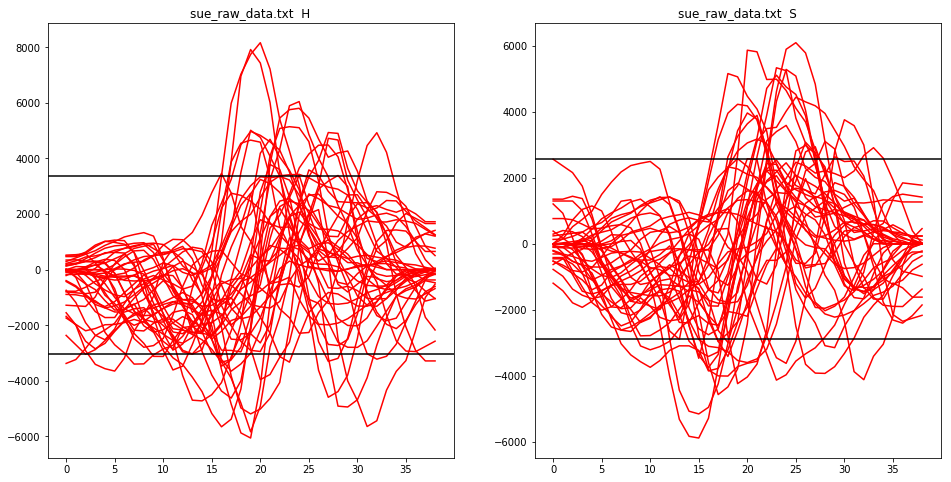

thisum_raw_data.txt HPP:6127.8 HMP:-7253.7 SPP:2782.1 SMP:-2928.8


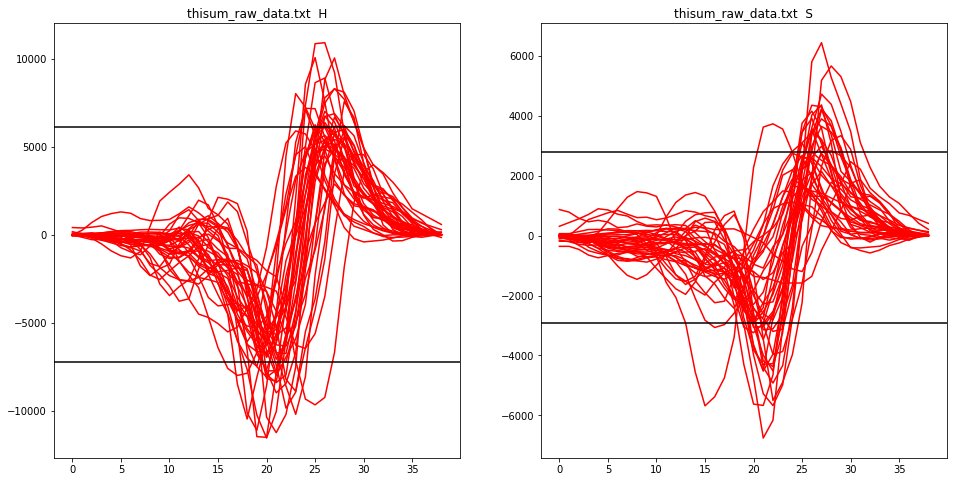

vipula_raw_data.txt HPP:1827.0 HMP:-1457.7 SPP:1916.0 SMP:-1225.9


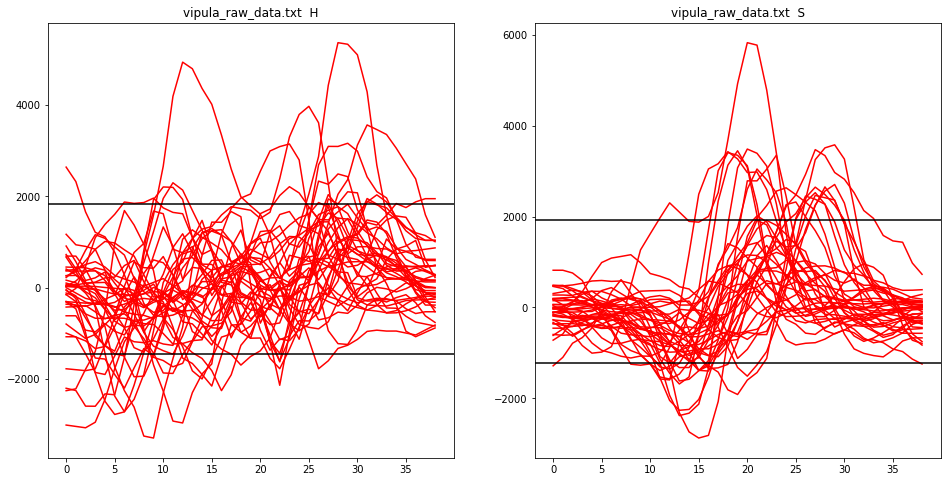

yihan_raw_data.txt HPP:5921.9 HMP:-4606.2 SPP:2452.85 SMP:-2508.9


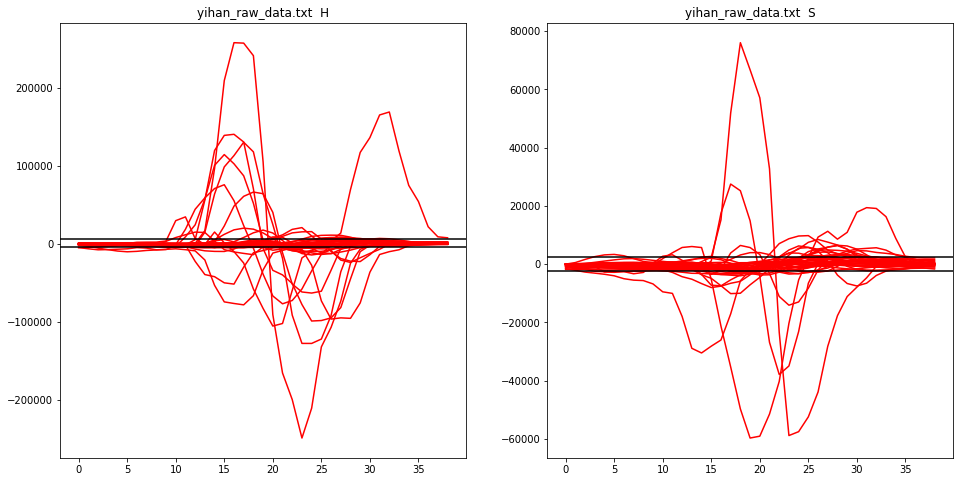

Yilei_raw_data.txt HPP:2760.5 HMP:-2017.2 SPP:1126.3 SMP:-1304.6


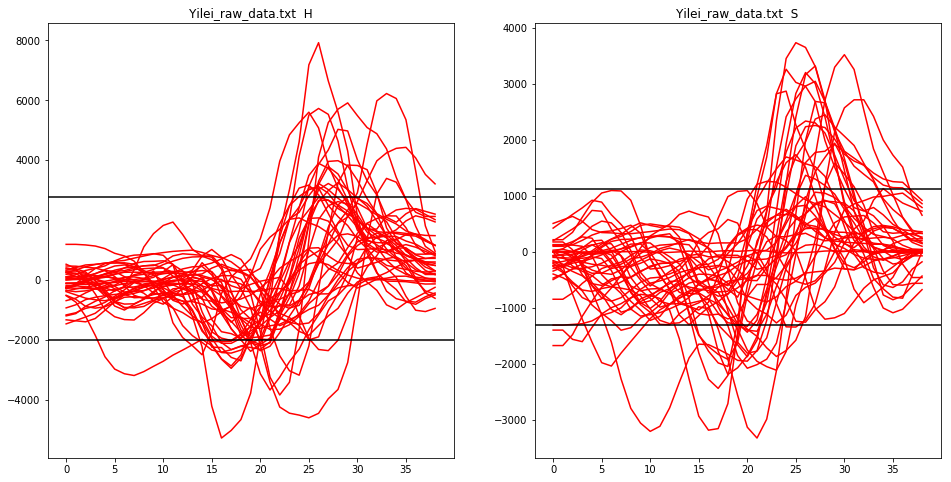

yvonne_raw_data.txt HPP:1686.4 HMP:-653.7 SPP:524.6 SMP:-527.0


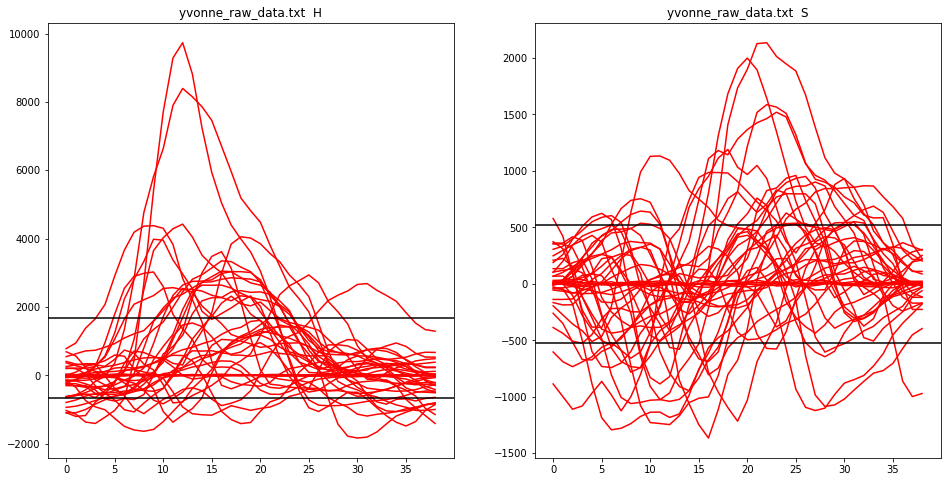

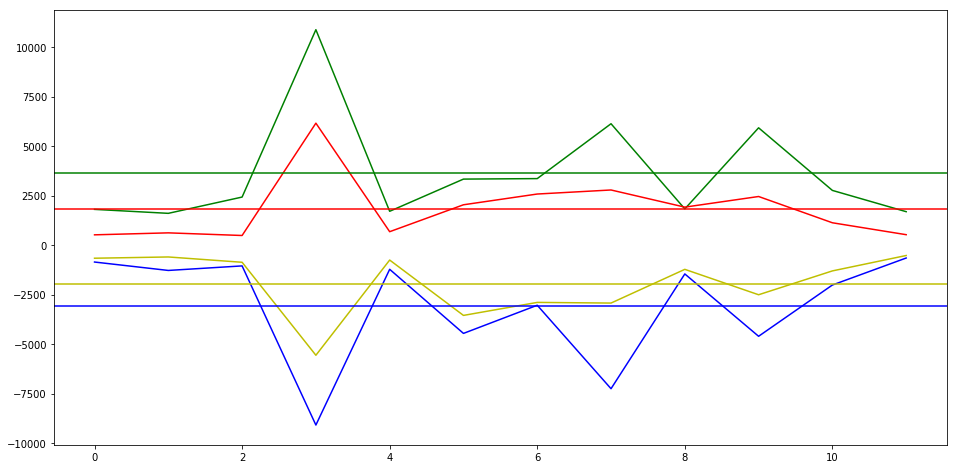

In [461]:
hpp = []
hpm = []
spp = []
spm = []
for root, dirs, files in os.walk("../new_data_processing/same_range_grad/"):
    for i, filename in enumerate(files):
        data = pd.read_csv(root + "/" + filename, header=None)
        X = data.values[:, 0:39]
        Y = data.values[:, 39]
#         fig = plt.figure(num=1, figsize=(16, 8))
        plus_peak_h = []
        minus_peak_h = []
        plus_peak_s = []
        minus_peak_s = []
        
#         ax1 = plt.subplot(1, 2, 1)
#         ax2 = plt.subplot(1, 2, 2)
        length = range(len(X))
        for i in length:
            row = X[i]
            if Y[i] == 'H':
#                 ax1.plot(row)
#                 if row[row>0].size > 0:
#                     plus_peak_h.append(np.max(row[row>0]))
                if row[row<0].size > 0:
                    minus_peak_h.append(np.min(row[row<0]))
            elif Y[i] == 'S':
#                 ax2.plot(row)
#                 if row[row > 0].size > 0:
#                     plus_peak_s.append(np.max(row[row>0]))
                if row[row < 0].size > 0:
                    minus_peak_s.append(np.min(row[row<0]))
        ax1.set_title(filename + '  H')
        ax2.set_title(filename + '  S')
        ax1.axhline(np.median(plus_peak_h), color='k')
        ax1.axhline(np.median(minus_peak_h), color='k')
        ax2.axhline(np.median(plus_peak_s), color='k')
        ax2.axhline(np.median(minus_peak_s), color='k')
        print(filename + ' HPP:' + str(np.median(plus_peak_h)) + ' HMP:'+str(np.median(minus_peak_h)) + ' SPP:'+ str(np.median(plus_peak_s)) + ' SMP:' + str(np.median(minus_peak_s)))
        hpp.append(np.median(plus_peak_h))
        hpm.append(np.median(minus_peak_h))
        spp.append(np.median(plus_peak_s))
        spm.append(np.median(minus_peak_s))
        plt.savefig(filename+ ".pdf", quality=100)
    #         ax1.plot(np.average(plus_peak_h))
#         ax1.plot(np.average(minus_peak_h))
#         ax2.plot(np.average(plus_peak_s) 
#         ax2.plot(np.average(minus_peak_s) 
        plt.show()

plt.figure(num=1, figsize=(16, 8))
plt.plot(hpp, color='g')
plt.plot(hpm, color='b')
plt.plot(spp, color='r')
plt.plot(spm, color='y')
plt.axhline(np.average(hpp), color='g')
plt.axhline(np.average(hpm), color='b')
plt.axhline(np.average(spp), color='r')
plt.axhline(np.average(spm), color='y')


In [414]:
X = np.array([1,2,5,3,-4,-6,-3,4,1,6,-10])
print(np.sum(X[X>0])/len(X[X>0]))
print(np.sum(X[X<0])/len(X[X<0]))
print(np.min(X[X<0]))
print(np.max(X[X>0]))

3.14285714286
-5.75
-10
6


In [446]:
from scipy import stats
p = np.array([1,2,3,4,5,6,7,8,4,3,13])
print(np.ptp(p))
print(np.var(p))

12
10.2644628099


In [447]:
import statistics
 
print(statistics.mode([1,2,3,4,4,4,5,6]))

4
